In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Read the Airbnb data from an XLSX file
df = pd.read_excel('Airbnb_Open_Data.xlsx')

In [ ]:
# Display the first few rows of the dataframe
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
# Get information about the dataframe, including data types and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
# Count the number of duplicated rows
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
# Create a new dataframe for the 'Brooklyn' neighborhood group, correcting the spelling
df[df['neighbourhood group'] == 'brookln']



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)

# Drop columns with too many missing values ('house_rules', 'license')
df.drop(['house_rules', 'license'], axis=1, inplace=True)

# Clean and format the 'price' and 'service fee' columns
# Ensure they are strings before replacing characters
df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '')
df['service fee'] = df['service fee'].astype(str).str.replace('$', '').str.replace(',', '')

# Rename columns to match the target
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# Drop all rows that contain any missing (NaN) values
# This is the main step that reduces the number of entries
df.dropna(inplace=True)

# Correct the data types for multiple columns to match the target
df = df.astype({
    'id': str,
    'host id': str,
    'price_$': float,
    'service_fee_$': float,
    'Construction year': int,
    'review rate number': int,
    'calculated host listings count': int,
    'availability 365': int
})

df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Convert 'last review' column to a proper datetime format
df['last review'] = pd.to_datetime(df['last review'])

In [ ]:

# Count duplicated values again after cleaning
df.duplicated().value_counts()

,count
False,83797


In [ ]:
# Get information about the cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83797 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83797 non-null  object        
 1   NAME                            83797 non-null  object        
 2   host id                         83797 non-null  object        
 3   host_identity_verified          83797 non-null  object        
 4   host name                       83797 non-null  object        
 5   neighbourhood group             83797 non-null  object        
 6   neighbourhood                   83797 non-null  object        
 7   lat                             83797 non-null  float64       
 8   long                            83797 non-null  float64       
 9   country                         83797 non-null  object        
 10  country code                    83797 non-null  object        
 11  instan

In [ ]:
# --- EXPLORATORY DATA ANALYSIS (EDA) ---

# Generate descriptive statistics
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83797.000000,83797.000000,83797.000000,83797.000000,83597.000000,83568.000000,83797.000000,83797.000000,83797,83797.000000,83797.000000,83797.000000,83797.000000
mean,40.727355,-73.948502,0.497727,2012.489481,626.349151,125.233774,7.436722,32.229006,2019-06-09 15:15:56.697733888,1.375618,3.278841,7.049835,141.801341
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721340,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930790,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.056317,0.050338,0.499998,5.760501,331.813050,66.358543,28.122748,51.902177,NaN,1.749447,1.283730,29.568531,133.965307


In [ ]:
# What are the different property types in the Dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44368
Private room,37664
Shared room,1655
Hotel room,110


Text(0.5, 1.0, 'Property Types and their count in the dataset')

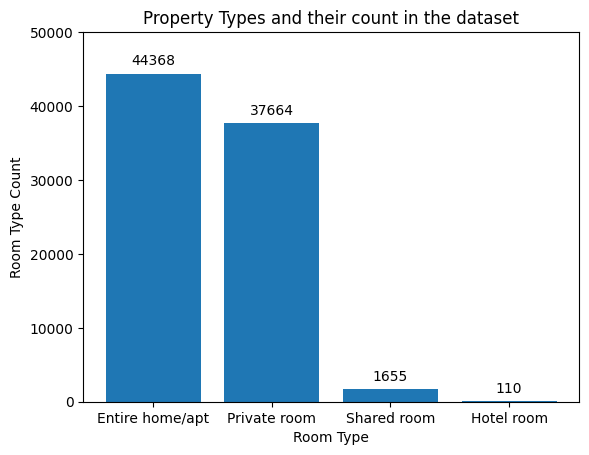

In [ ]:
# Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,'count'])
plt.bar_label(room_type_bar, labels = property_types.loc[:,'count'], padding = 4)
plt.ylim(0,50000)
plt.ylabel('Room Type Count')
plt.xlabel('Room Type')
plt.title('Property Types and their count in the dataset')


In [ ]:
# Which neighborhood group has the highest number of listings?
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34780
Manhattan,34736
Queens,11184
Bronx,2276
Staten Island,821


Text(0.5, 1.0, 'Which Neighborhood Groups has the highest number of listings')

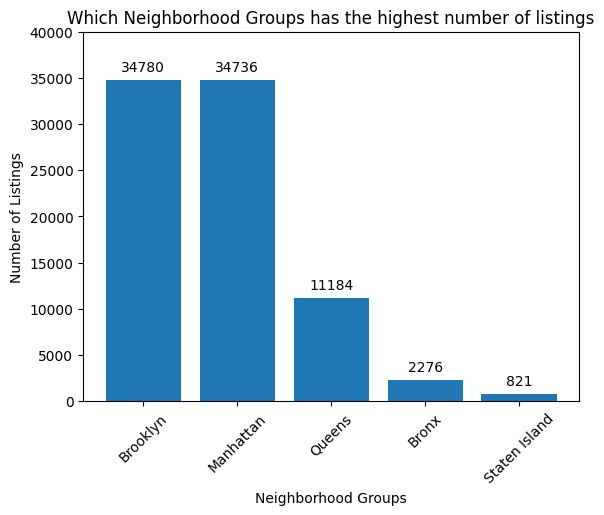

In [ ]:
# Neighborhood group with the highest number of listings
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,'count'])
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,'count'], padding = 4)
plt.ylim(0,40000)
plt.ylabel('Number of Listings')
plt.xlabel('Neighborhood Groups')
plt.xticks(rotation = 45)
plt.title('Which Neighborhood Groups has the highest number of listings')

Text(0.5, 1.0, 'Average Price per Listings ($) in each Neighborhood Group')

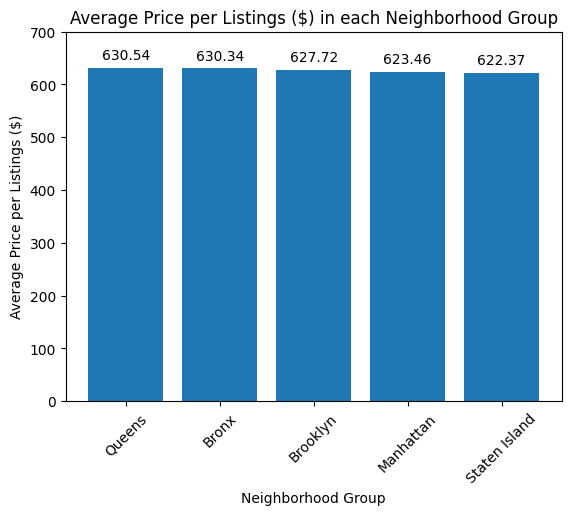

In [ ]:
# Which neighborhood group has the highest average prices for Airbnb listings?
avg_price = df.groupby(['neighbourhood group'])['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$'])
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,'price_$'], 2), label_type = 'edge', padding = 4)
plt.ylim(0,700)
plt.ylabel('Average Price per Listings ($)')
plt.xlabel('Neighborhood Group')
plt.xticks(rotation = 45)
plt.title('Average Price per Listings ($) in each Neighborhood Group')

Text(0.5, 1.0, 'Average Price ($) for Properties in each Construction Year')

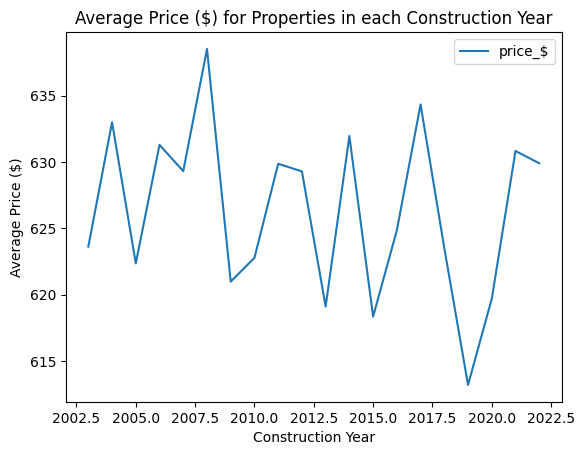

In [ ]:
# Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.ylabel('Average Price ($)')
plt.xlabel('Construction Year')
plt.title('Average Price ($) for Properties in each Construction Year')

Text(0.5, 1.0, 'Top 10 Hosts by Calculated Host Listings Count')

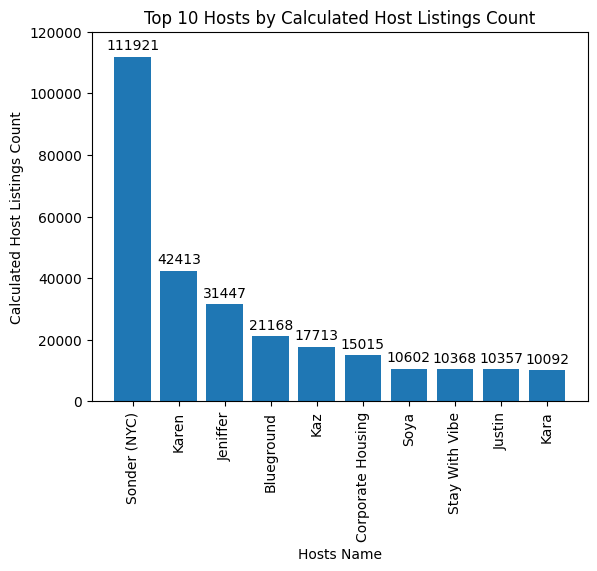

In [ ]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby(['host name'])['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(hosts_bar, labels = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3)
plt.ylabel('Calculated Host Listings Count')
plt.xlabel('Hosts Name')
plt.xticks(rotation = 90)
plt.ylim(0, 120000)
plt.title('Top 10 Hosts by Calculated Host Listings Count')

In [ ]:
# Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby(['host_identity_verified'])['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283897
unconfirmed,3.273786


Text(0.5, 1.0, 'Average Review Rate for each Verification Statistics')

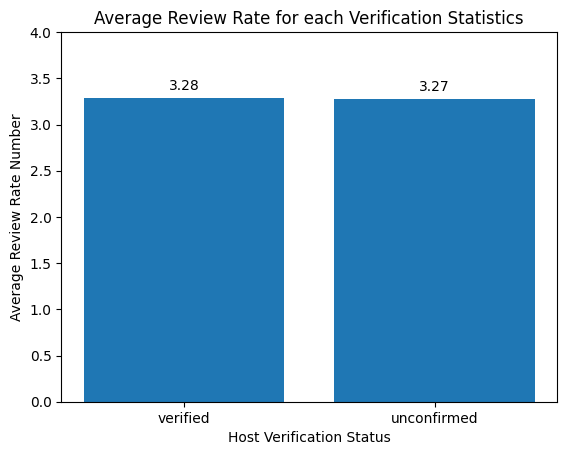

In [ ]:
review_bar = plt.bar(review.index, review.loc[:,'review rate number'])
plt.bar_label(review_bar, labels = round(review.loc[:,'review rate number'], 2), padding = 4)
plt.ylim(0,4.0)
plt.ylabel('Average Review Rate Number')
plt.xlabel('Host Verification Status')
plt.title('Average Review Rate for each Verification Statistics')

Text(0.5, 1.0, 'Average Review Rate for each Verification Status')

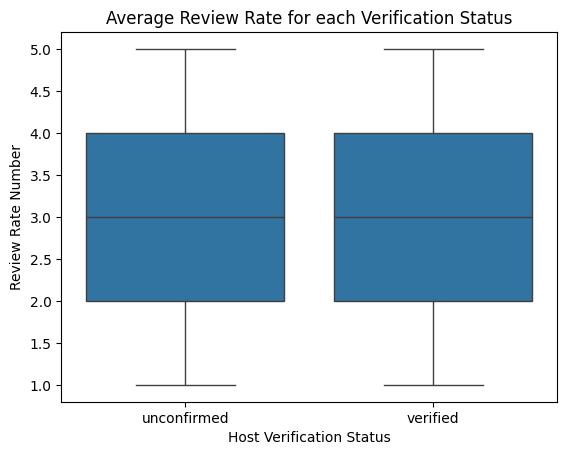

In [ ]:
# Box plot for review rates based on verification status
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'host_identity_verified', y = 'review rate number', color = base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Verification Status')

In [ ]:
# Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909085489923)

Text(0.5, 1.0, 'A Regression Plot showing the Correlation of a Listing and its Service Fee')

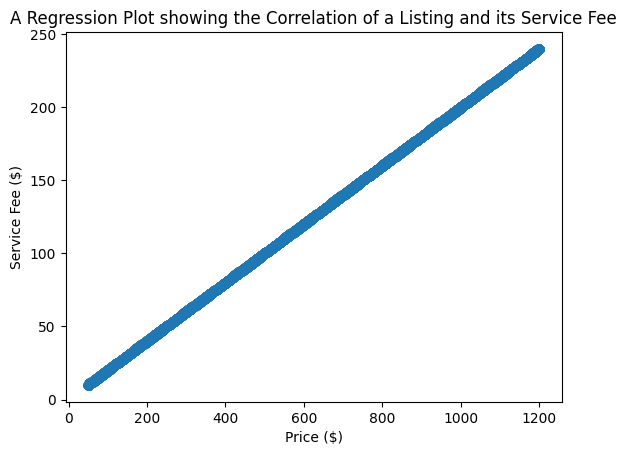

In [ ]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$')
plt.ylabel('Service Fee ($)')
plt.xlabel('Price ($)')
plt.title('A Regression Plot showing the Correlation of a Listing and its Service Fee')

Text(0.5, 1.0, 'Average Review Rate for each Room/Property Type in each Neighbourhood Group.')

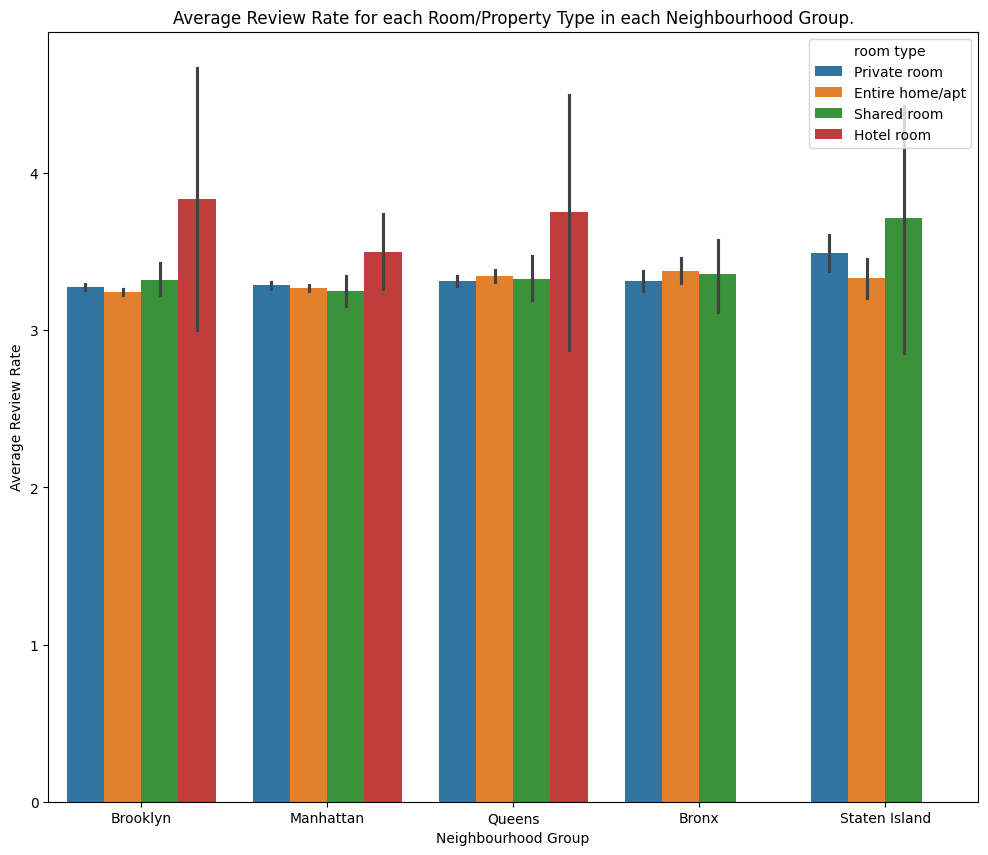

In [ ]:
# What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

plt.figure(figsize = (12,10))
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.')

np.float64(0.1347092579208049)

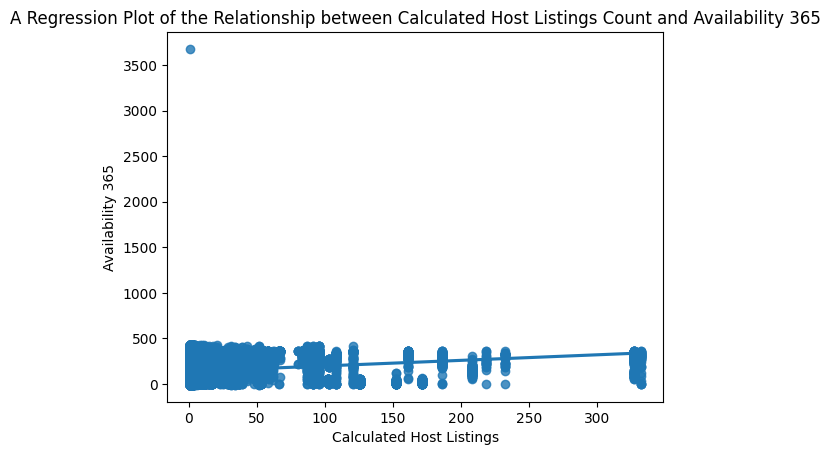

In [ ]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365')
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

df['calculated host listings count'].corr(df['availability 365'])